In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("dataset.csv")

In [4]:
df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df.fillna(0)


In [6]:
df['gdp_per_capita'] = np.where(df['population'] != 0, df['gdp'] / df['population'], 0)

In [7]:
co2 = df[['year','country','co2']]
continents = ['World', 'Asia', 'Oceania', 'Europe', 'Africa', 'North America', 'South America', 'Antarctica']

In [8]:
co2_ok = co2[co2['country'].isin(continents)]

In [9]:
co2group = co2_ok.groupby(['country', 'year'])['co2'].mean().reset_index().sort_values(by='year').reset_index(drop=True).set_index('year')

In [10]:
co2group

,country,co2
year,,
1750,Africa,0.000
1750,World,9.351
1750,South America,0.000
1750,Europe,9.351
1750,Oceania,0.000
...,...,...
2021,Oceania,443.192
2021,Asia,21688.988
2021,North America,6137.900


In [11]:
co2world = co2group[co2group['country'] == 'World']
co2Asia = co2group[co2group['country'] == 'Asia']
co2Oceania = co2group[co2group['country'] == 'Oceania']
co2Europe = co2group[co2group['country'] == 'Europe']
co2Africa = co2group[co2group['country'] == 'Africa']
co2NorthAmerica = co2group[co2group['country'] == 'North America']
co2SouthAmerica = co2group[co2group['country'] == 'South America']
co2Antarctica = co2group[co2group['country'] == 'Antarctica']

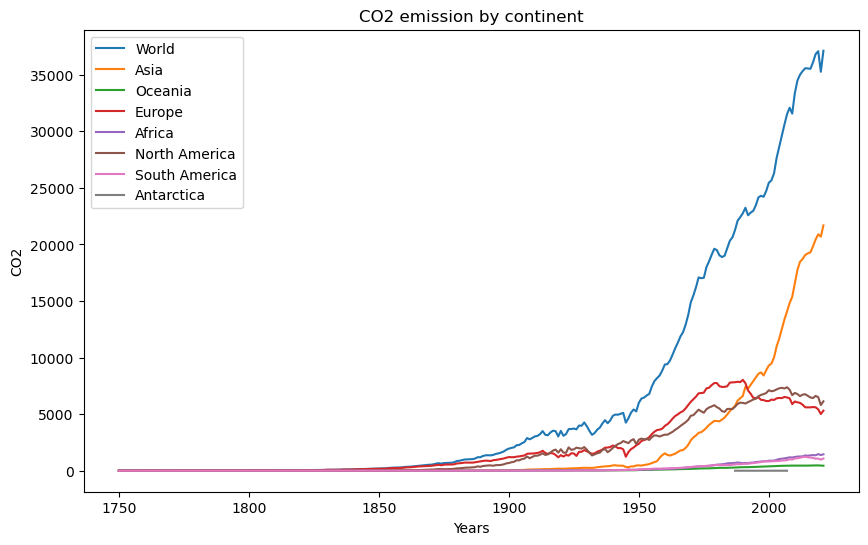

In [12]:
fig = plt.figure(figsize = (10,6))


co2world['co2'].plot()
co2Asia['co2'].plot()
co2Oceania['co2'].plot()
co2Europe['co2'].plot()
co2Africa['co2'].plot()
co2NorthAmerica['co2'].plot()
co2SouthAmerica['co2'].plot()
co2Antarctica['co2'].plot()
plt.legend(['World', 'Asia', 'Oceania', 'Europe', 'Africa', 'North America', 'South America', 'Antarctica'])
plt.title("CO2 emission by continent")
plt.xlabel("Years")
plt.ylabel("CO2")
plt.savefig('Co2emission.png')
plt.show()


In [13]:
co2percapita = df[['year','country','co2_per_capita']]
co2percapita_ok = co2percapita[co2percapita['country'].isin(continents)]
co2percapitagroup = co2percapita_ok.groupby(['country', 'year'])['co2_per_capita'].mean().reset_index().sort_values(by='year').reset_index(drop=True).set_index('year')


In [14]:
co2percapitagroup

,country,co2_per_capita
year,,
1750,Africa,0.000
1750,World,0.013
1750,South America,0.000
1750,Europe,0.062
1750,Oceania,0.000
...,...,...
2021,Oceania,10.017
2021,Asia,4.621
2021,North America,10.283


In [15]:
cpcworld = co2percapitagroup[co2percapitagroup['country'] == 'World']
cpcAsia = co2percapitagroup[co2percapitagroup['country'] == 'Asia']
cpcOceania = co2percapitagroup[co2percapitagroup['country'] == 'Oceania']
cpcEurope = co2percapitagroup[co2percapitagroup['country'] == 'Europe']
cpcAfrica = co2percapitagroup[co2percapitagroup['country'] == 'Africa']
cpcNorthAmerica = co2percapitagroup[co2percapitagroup['country'] == 'North America']
cpcSouthAmerica = co2percapitagroup[co2percapitagroup['country'] == 'South America']
cpcAntarctica = co2percapitagroup[co2percapitagroup['country'] == 'Antarctica']

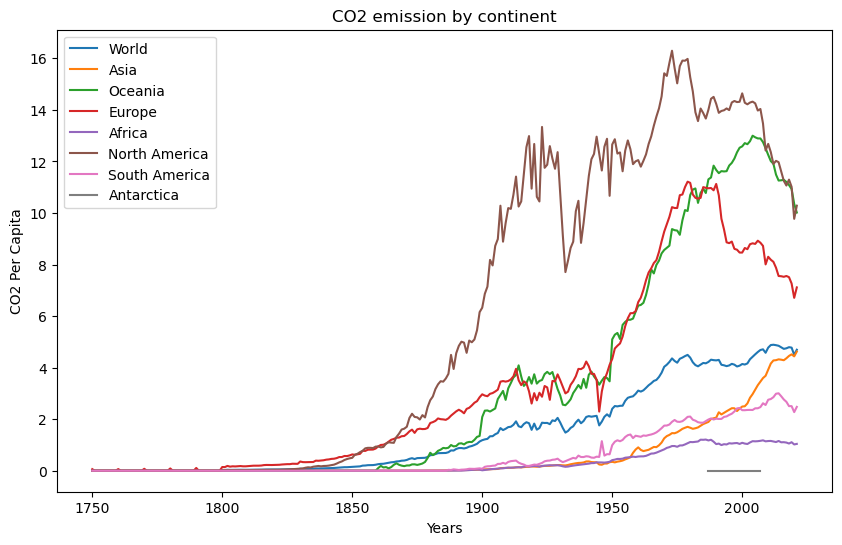

In [16]:
fig = plt.figure(figsize = (10,6))


cpcworld['co2_per_capita'].plot()
cpcAsia['co2_per_capita'].plot()
cpcOceania['co2_per_capita'].plot()
cpcEurope['co2_per_capita'].plot()
cpcAfrica['co2_per_capita'].plot()
cpcNorthAmerica['co2_per_capita'].plot()
cpcSouthAmerica['co2_per_capita'].plot()
cpcAntarctica['co2_per_capita'].plot()
plt.legend(['World', 'Asia', 'Oceania', 'Europe', 'Africa', 'North America', 'South America', 'Antarctica'])
plt.title("CO2 emission by continent")
plt.xlabel("Years")
plt.ylabel("CO2 Per Capita")
plt.savefig('Cpcemission.png')
plt.show()


In [17]:
continent = ['Asia', 'Oceania', 'Europe', 'Africa', 'North America', 'South America']
df_ok = df[df['country'].isin(continent)]

In [18]:
coal_co2 = df['coal_co2']
oil_co2 = df['oil_co2']
gas_co2 = df['gas_co2']

In [19]:
coal_co2sum = df_ok.groupby('country')['coal_co2'].sum()
oil_co2sum = df_ok.groupby('country')['oil_co2'].sum()
gas_co2sum = df_ok.groupby('country')['gas_co2'].sum()

In [20]:
coal_co2sum

country
Africa            20588.994
Asia             295094.917
Europe           285744.384
North America    186845.356
Oceania           11034.315
South America      4880.349
Name: coal_co2, dtype: float64

In [21]:
oil_co2sum

country
Africa            17376.517
Asia             161598.469
Europe           153384.494
North America    195677.184
Oceania            7132.462
South America     27198.899
Name: oil_co2, dtype: float64

In [22]:
gas_co2sum

country
Africa            6304.813
Asia             60839.257
Europe           83982.349
North America    92314.496
Oceania           2498.384
South America     8118.475
Name: gas_co2, dtype: float64

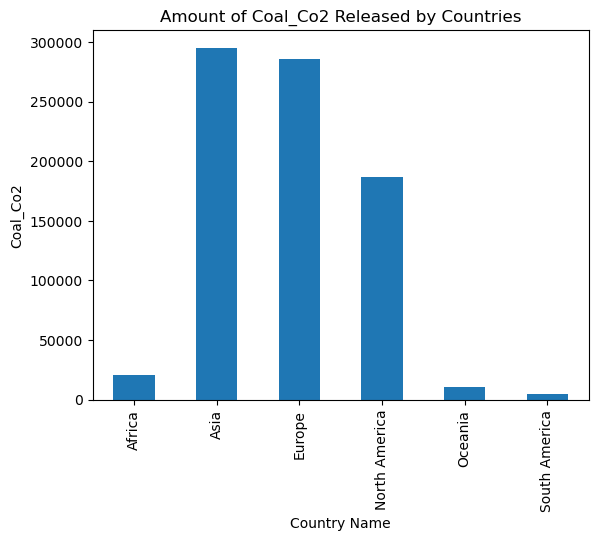

In [23]:
coal_co2sum.plot(kind='bar', x='country', y='coal_co2')
plt.title("Amount of Coal_Co2 Released by Countries")
plt.xlabel("Country Name")
plt.ylabel("Coal_Co2")
plt.savefig("Coal_co2.png")
plt.show()

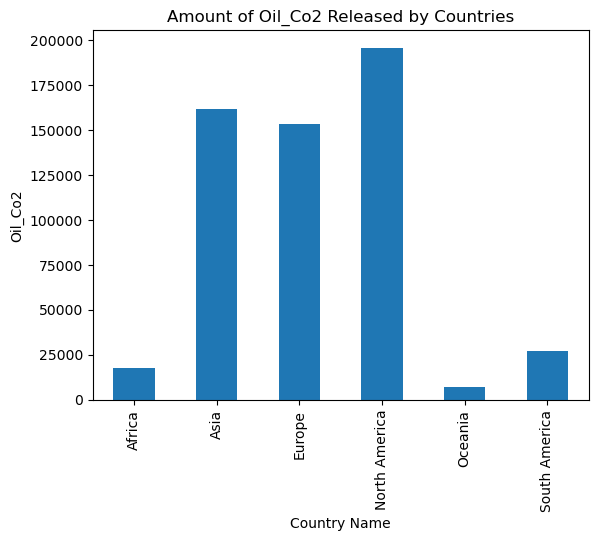

In [24]:
oil_co2sum.plot(kind='bar', x='country', y='oil_co2')
plt.title("Amount of Oil_Co2 Released by Countries")
plt.xlabel("Country Name")
plt.ylabel("Oil_Co2")
plt.savefig("Oil_co2.png")
plt.show()

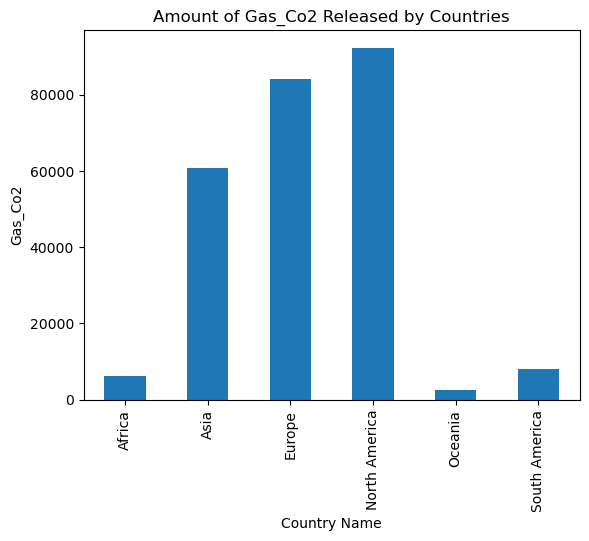

In [25]:
gas_co2sum.plot(kind='bar', x='country', y='gas_co2')
plt.title("Amount of Gas_Co2 Released by Countries")
plt.xlabel("Country Name")
plt.ylabel("Gas_Co2")
plt.savefig("Gas_co2.png")
plt.show()

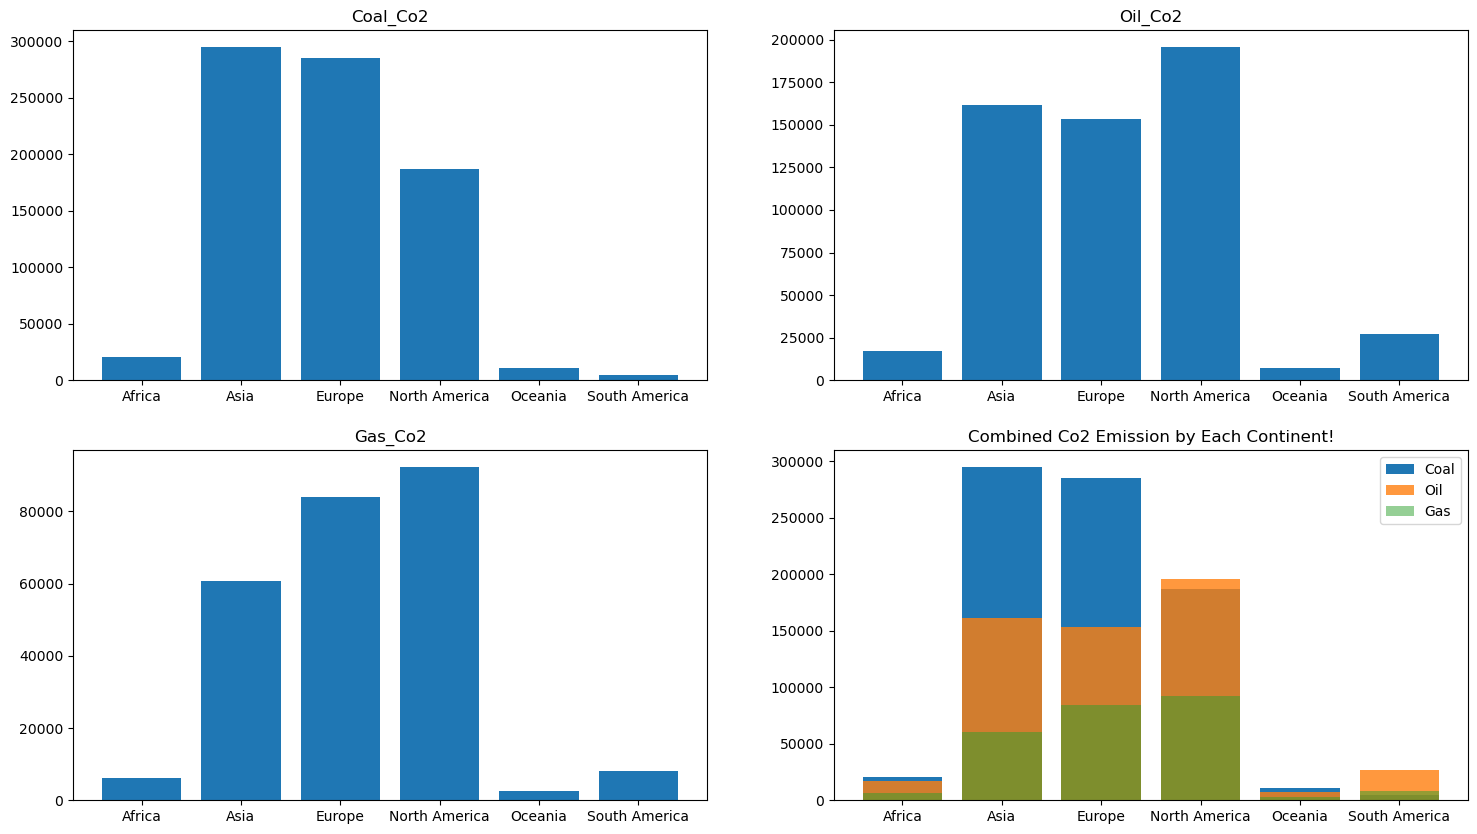

In [34]:
plt.figure(figsize=(18,10))
x = ['Africa', 'Asia','Europe','North America','Oceania','South America']

plt.subplot(2,2, 1)
plt.bar(x,coal_co2sum)
plt.title('Coal_Co2')

plt.subplot(2,2, 2)
plt.bar(x,oil_co2sum)
plt.title("Oil_Co2")

plt.subplot(2,2, 3)
plt.bar(x,gas_co2sum)
plt.title("Gas_Co2")

plt.subplot(2,2, 4)
plt.bar(x,coal_co2sum, alpha=1)
plt.bar(x,oil_co2sum,alpha=0.8)
plt.bar(x,gas_co2sum,alpha=0.5)
plt.legend(['Coal', 'Oil', 'Gas'])
plt.title("Combined Co2 Emission by Each Continent!")



plt.savefig("infograph.png")
plt.show()